In [1]:
# Package Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the Dataset
data = pd.read_csv("newsqa-data-v1.csv")

In [3]:
data.head()

story_id  \
0  ./cnn/stories/42d01e187213e86f5fe617fe32e716ff...   
1  ./cnn/stories/c48228a52f26aca65c31fad273e66164...   
2  ./cnn/stories/c65ed85800e4535f4bbbfa2c34d7d963...   
3  ./cnn/stories/0cf66b646e9b32076513c050edf32a79...   
4  ./cnn/stories/13012604e3203c18df09289dfedd14cd...   

                                            question       answer_char_ranges  \
0          What was the amount of children murdered?        294:297|None|None   
1                     Where was one employee killed?    34:60|1610:1618|34:60   
2  who did say South Africa did not issue a visa ...  103:127|114:127|839:853   
3            How many years old was the businessman?          538:550|538:550   
4                      What frightened the families?  690:742|688:791|630:646   

   is_answer_absent is_question_bad             validated_answers  
0               0.0             0.0     {"none": 1, "294:297": 2}  
1               0.0             0.0                           NaN  
2               0.0             0.0  {"839:853": 1, "103:127": 2}  
3               0.0             0.0                           NaN  
4               0.0             0.0  {"688:791": 2, "690:742": 1}

In [4]:
data.columns

Index(['story_id', 'question', 'answer_char_ranges', 'is_answer_absent',
       'is_question_bad', 'validated_answers'],
      dtype='object')

In [5]:
len(data)

119633

There are 119633 entries in the data set. Each entry has 6 responses. The entries contain the following information:

    story_id: some sort of identifying information for each story - not the url
    
    question: reading comprehension question
    
    answer_char_ranges: range of character indices where the answer can be found, various answers from crowdsourcers are separated by "|"
    
    is_answer_absent: proportion of crowdsourcers that say that the answer is absent
    
    is_question_bad: proportion of crowdsourcers that say the question is bad
    
    validated_answers: the answers from validators
    
The text of the stories is not provided in this data set, but I believe we can download it as well.

## Story ID Variable

In [12]:
sum(data.story_id.isnull())

0

In [30]:
len(data.story_id.unique())

12744

Each entry contains a Story ID. Of the 119633 entries, there are 12744 unique responses. I assume this means that there are ~120000 questions from these ~13000 articles.

In [4]:
# Look at how many questions are asked for each story
stories = pd.DataFrame(data.story_id.drop_duplicates())
stories.set_index('story_id', inplace = True)
stories['num_entries'] = np.zeros(len(stories))

for e in data.index:
    stories['num_entries'].loc[data.story_id.loc[e]] += 1

Text(0,0.5,'Number of Stories')

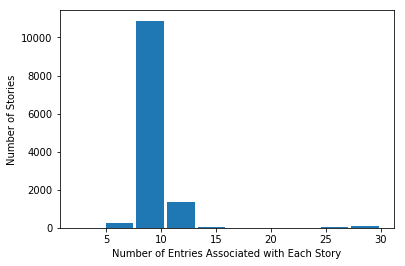

In [5]:
plt.hist(stories.num_entries, rwidth = 0.9)
plt.xlabel("Number of Entries Associated with Each Story")
plt.ylabel("Number of Stories")

In [6]:
print("Mean:", np.mean(stories.num_entries))
print("Median:", np.median(stories.num_entries))
print("Minimum:", np.min(stories.num_entries))
print("Maximum:", np.max(stories.num_entries))

Mean: 9.38739799121155
Median: 9.0
Minimum: 2.0
Maximum: 30.0


In [103]:
stories['num_entries'].value_counts()

9.0     9395
8.0     1401
12.0    1052
11.0     321
7.0      203
10.0      86
6.0       71
29.0      40
30.0      40
15.0      36
28.0      31
27.0      20
14.0      15
26.0      10
3.0       10
25.0       3
17.0       2
5.0        2
23.0       2
2.0        2
13.0       1
18.0       1
Name: num_entries, dtype: int64

Most of the stories have 8 or 9 questions associated with them. They may have as many as 30 or as few as 2.

## Question Variable

In [29]:
sum(data.question.isnull())

2

In [28]:
len(data.question.unique())

115275

Two of the entries do not contain the question. Of the 119633 entries, there are 115275 unique questions.

In [33]:
len(data.question.loc[15].split())

6

In [7]:
# Taking a closer look at the duplicate questions
dup_q = data[data.question.duplicated(keep = False)]

In [8]:
len(dup_q)

6744

In [9]:
dup_q.head()

story_id  \
15   ./cnn/stories/4d181b23eb2a5c73f17f6c6c8856ad24...   
70   ./cnn/stories/ef6e7ee88adc48f680e91d00c065f268...   
87   ./cnn/stories/aa905ece59d1c439708984809017ac1a...   
121  ./cnn/stories/44f55c84c4a580853e384c860bb2ba3a...   
144  ./cnn/stories/b1e998cd481253945d4f174d3686ea16...   

                               question  \
15   What did the French president say?   
70       What does the Dalai Lama seek?   
87     When was the trial due to start?   
121             who is Sonia Sotomayor?   
144       What group is being targeted?   

                                    answer_char_ranges  is_answer_absent  \
15                       3816:3859|3798:3859|3798:4072               0.0   
70                                     363:373|363:373               0.0   
87                                     377:388|377:388               0.0   
121                                    164:170|164:170               0.0   
144  220:227,439:504,610:619,847:856|439:482|236:24...               0.0   

    is_question_bad validated_answers  
15              0.0  {"3798:4072": 2}  
70              0.0               NaN  
87              0.0               NaN  
121             0.0               NaN  
144             0.0    {"439:504": 2}

In [10]:
len(dup_q.story_id.unique())

4602

In [11]:
qs = dup_q.question.drop_duplicates()

In [12]:
len(qs)

2386

In [13]:
qs = pd.DataFrame(qs)

In [14]:
qs['num_entries'] = np.zeros(len(qs))

In [15]:
for q in range(0, len(qs)):
    qs.num_entries.iloc[q] = len(dup_q[dup_q.question == qs.question.iloc[q]])

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0,0.5,'Number of Questions')

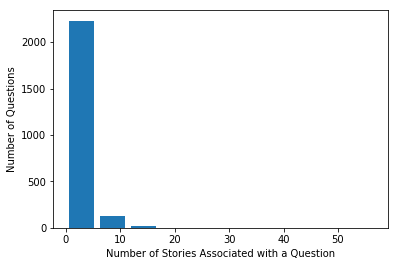

In [16]:
plt.hist(qs.num_entries, rwidth = 0.8)
plt.xlabel("Number of Stories Associated with a Question")
plt.ylabel("Number of Questions")

In [26]:
print("Mean:", np.mean(qs.num_entries))
print("Median:", np.median(qs.num_entries))
print("Minimum:", np.min(qs.num_entries))
print("Maximum:", np.max(qs.num_entries))

Mean: 2.8256496227996646
Median: 2.0
Minimum: 0.0
Maximum: 57.0


In [25]:
qs.sort_values(by = "num_entries")

num_entries  num_stories  \
question                                                                       
NaN                                                         0.0          2.0   
What did the French president say?                          2.0          2.0   
She considered Botox but says she doesn't have ...          2.0          2.0   
Where did the explosions take place?                        2.0          2.0   
What war did he serve in?                                   2.0          2.0   
How many scouts took part in the sunrise ceremo...          2.0          2.0   
What age is Michael Brewer?                                 2.0          2.0   
where is it held                                            2.0          2.0   
What is happening now?                                      2.0          2.0   
when was she last seen                                      2.0          2.0   
How many people are still missing?                          2.0          2.0   
What does Zelizer say?                                      2.0          2.0   
Where should you shop?                                      2.0          2.0   
Who cooperated with police?                                 2.0          2.0   
Where is the office?                                        2.0          2.0   
Who was wounded in the attack?                              2.0          2.0   
Who is the Iranian President?                               2.0          2.0   
what does faa say                                           2.0          2.0   
How many soldiers has Rwanda dispatched?                    2.0          2.0   
Who is being replaced?                                      2.0          2.0   
What was the record?                                        2.0          2.0   
Where did they march?                                       2.0          2.0   
what was the motive                                         2.0          2.0   
What does the move do?                                      2.0          2.0   
When did the bomb go off?                                   2.0          2.0   
what does he do                                             2.0          2.0   
Where is Germany?                                           2.0          2.0   
What was the girl's age?                                    2.0          2.0   
from its big opening last weekend "The Last Hou...          2.0          2.0   
When was the date?                                          2.0          2.0   
...                                                         ...          ...   
What did officials say?                                    12.0         12.0   
What was the death toll?                                   12.0         12.0   
What did police say?                                       12.0         12.0   
How many died?                                             13.0         13.0   
How many were injured?                                     13.0         13.0   
Where did this happen?                                     13.0         13.0   
Who is the president?                                      13.0         13.0   
what did the police say                                    13.0         13.0   
What is the death toll?                                    13.0         13.0   
What caused the crash?                                     13.0         13.0   
when did this happen?                                      14.0         14.0   
When did this happen?                                      14.0         14.0   
What does the video show?                                  14.0         14.0   
What did the police say?                                   15.0         15.0   
where did this happen                                      15.0         15.0   
What did the spokesman say?                                16.0         16.0   
What is the name of the movie?                             17.0         17.0   
How many people were injured?                       

The questions that are duplicated are fairly generic nature. Most of the duplicated questions only show up twice, but some show up much more frequently. The more frequently asked questions are particularly generic (e.g. "How many people were killed?")

In [18]:
# qs.set_index("question", inplace = True)
qs['num_stories'] = np.zeros(len(qs))
qs['stories'] = np.zeros(len(qs))

for e in dup_q.index:
    q = dup_q.question.loc[e]
    if qs.stories.loc[q] == 0:
        qs.stories.loc[q] = [dup_q['story_id'].loc[e]]
    else:
        qs.stories.loc[q].append(dup_q.story_id.loc[e])
    

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
qs.head()

num_entries  num_stories  \
question                                                       
What did the French president say?          2.0          0.0   
What does the Dalai Lama seek?              2.0          0.0   
When was the trial due to start?            2.0          0.0   
who is Sonia Sotomayor?                     2.0          0.0   
What group is being targeted?               2.0          0.0   

                                                                              stories  
question                                                                               
What did the French president say?  [./cnn/stories/4d181b23eb2a5c73f17f6c6c8856ad2...  
What does the Dalai Lama seek?      [./cnn/stories/ef6e7ee88adc48f680e91d00c065f26...  
When was the trial due to start?    [./cnn/stories/aa905ece59d1c439708984809017ac1...  
who is Sonia Sotomayor?             [./cnn/stories/44f55c84c4a580853e384c860bb2ba3...  
What group is being targeted?       [./cnn/stories/b1e998cd481253945d4f174d3686ea1...

In [20]:
for q in qs.index:
    qs.num_stories.loc[q] = len(set(qs.stories.loc[q]))

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
qs['duplicate'] = np.zeros(len(qs))
for q in qs.index:
    if qs.num_entries.loc[q] != qs.num_stories.loc[q]:
        qs.duplicate.loc[q] = 1

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
qs.duplicate.value_counts()

0.0    2385
1.0       1
Name: duplicate, dtype: int64

This indicates that there is one question applied to the same story, at least once.

In [23]:
qs[qs.duplicate == 1]

num_entries  num_stories  \
question                             
NaN               0.0          2.0   

                                                    stories  duplicate  
question                                                                
NaN       [./cnn/stories/c7aa75130c60a0fed530dcc65aa06da...        1.0

Given that the duplicated question is actually when the question is not provided, this does not seem like it will be a major issue. We should consider if we want to include entries that don't have a question at all.

In [44]:
range(0, len(qs))

range(0, 2386)

In [50]:
# len(data.question.loc[15].split())
# qs.index[3]
qs['word_count'] = np.zeros(len(qs))
for e in range(0, len(qs)):
    if type(qs.index[e]) == str:
        qs['word_count'].iloc[e] = len(qs.index[e].split())
    else:
        qs['word_count'].iloc[e] = 0

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0,0.5,'Number of Questions')

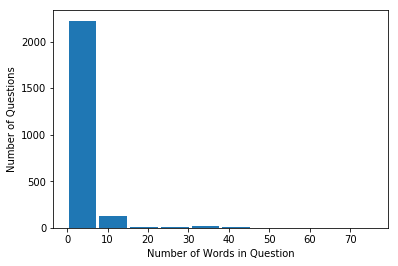

In [51]:
plt.hist(qs.word_count, rwidth = 0.9)
plt.xlabel("Number of Words in Question")
plt.ylabel("Number of Questions")

In [52]:
print("Mean:", np.mean(qs.word_count))
print("Median:", np.median(qs.word_count))
print("Minimum:", np.min(qs.word_count))
print("Maximum:", np.max(qs.word_count))

Mean: 5.407795473595977
Median: 5.0
Minimum: 0.0
Maximum: 76.0


## Answer_Char_Ranges Variable

In [104]:
data.answer_char_ranges.head()

0          294:297|None|None
1      34:60|1610:1618|34:60
2    103:127|114:127|839:853
3            538:550|538:550
4    690:742|688:791|630:646
Name: answer_char_ranges, dtype: object

In [107]:
len(data.answer_char_ranges.unique())

95733

It appears that there are fairly unique answers for each entry. This variable provides the range of the text where the answer can be found according to crowdsourced responses.

## Is Answer Absent? Variable

In [108]:
data.is_answer_absent.unique()

array([0.        , 0.33333333, 0.5       , 1.        , 0.66666667,
       0.2       , 0.4       , 0.25      , 0.75      , 0.6       ,
       0.16666667, 0.14285714, 0.125     , 0.71428571, 0.8       ,
       0.85714286, 0.18181818])

Text(0,0.5,'Number of Entries')

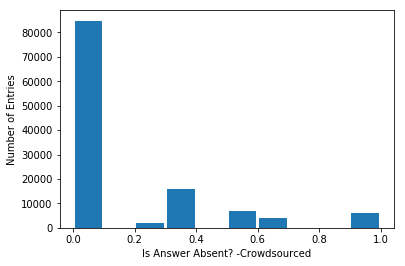

In [27]:
plt.hist(data.is_answer_absent, rwidth = 0.9)
plt.xlabel("Is Answer Absent? -Crowdsourced")
plt.ylabel("Number of Entries")

In [111]:
(data.is_answer_absent == 1).value_counts()

False    113455
True       6178
Name: is_answer_absent, dtype: int64

In [21]:
sum(data['is_answer_absent'].isnull())

0

There are 6178 entries where the consensus from the crowdsourcers is that the answer is absent.

In [114]:
data[data['is_answer_absent'] == 1]['validated_answers'].unique()

array([nan], dtype=object)

All of the entries where the crowdsourcers agreed there was no answer, there is also no validated answer

In [133]:
data[(data['is_answer_absent'] > 0) & (data['is_answer_absent'] < 1)]['validated_answers'].value_counts()

{"none": 2}                                       1469
{"bad_question": 2}                                284
{"none": 2, "bad_question": 1}                     113
{"none": 1, "bad_question": 2}                      86
{"9:17": 2}                                          8
{"9:14": 2}                                          7
{"0:6": 2}                                           6
{"1796:1802": 2}                                     6
{"91:103": 2}                                        5
{"25:38": 2}                                         5
{"324:337": 2}                                       5
{"322:339": 2}                                       4
{"0:9": 2}                                           4
{"81:102": 2}                                        4
{"9:18": 2}                                          4
{"156:160": 2}                                       4
{"25:31": 2}                                         4
{"153:172": 2}                                       4
{"81:85": 

## Is Question Bad? Variable

In [3]:
data.is_question_bad.unique()

array(['0.0', '0.333333333333', '0.5', '1.0', '?', '0.666666666667',
       '0.75', '0.2', '0.25', '0.4', '0.6', '0.8', '0.166666666667',
       '0.142857142857', '0.833333333333', '0.125', '0.181818181818'],
      dtype=object)

In [18]:
# are these values strings or numbers? THEY ARE STRINGS
data.is_question_bad.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_question_bad, dtype: float64

In [19]:
sum(data['is_question_bad'].isnull())

11772

In [28]:
for e in range(0, len(data)):
    if data.is_question_bad.iloc[e] == "?":
        data.is_question_bad.iloc[e] = np.nan

C:\Users\kplat\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
data['is_question_bad'] = pd.to_numeric(data['is_question_bad'])

Text(0,0.5,'Number of Entries')

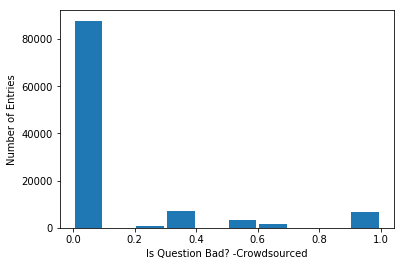

In [30]:
plt.hist(data['is_question_bad'].dropna(), rwidth = 0.9)
plt.xlabel("Is Question Bad? -Crowdsourced")
plt.ylabel("Number of Entries")

In [7]:
data.is_question_bad.value_counts()

0.000000    87810
0.333333     7013
1.000000     6646
0.500000     3494
0.666667     1802
0.250000      743
0.200000      175
0.750000       76
0.400000       48
0.166667       24
0.600000       19
0.800000        7
0.142857        1
0.833333        1
0.181818        1
0.125000        1
Name: is_question_bad, dtype: int64

In [11]:
data[data['is_question_bad'] == 1]['validated_answers'].unique()

array([nan], dtype=object)

## Validated Answers Variable

In [15]:
data['validated_answers'].head()

0       {"none": 1, "294:297": 2}
1                             NaN
2    {"839:853": 1, "103:127": 2}
3                             NaN
4    {"688:791": 2, "690:742": 1}
Name: validated_answers, dtype: object

In [16]:
sum(data.validated_answers.isnull())

68003

In [17]:
data['validated_answers'].value_counts()

{"none": 2}                                       2724
{"bad_question": 2}                                503
{"none": 2, "bad_question": 1}                     197
{"none": 1, "bad_question": 2}                     148
{"9:17": 2}                                         15
{"9:14": 2}                                         14
{"9:18": 2}                                         13
{"20:36": 2}                                        10
{"9:15": 2}                                         10
{"9:13": 2}                                          9
{"16:22": 2}                                         9
{"0:6": 2}                                           8
{"9:19": 2}                                          8
{"30:43": 2}                                         8
{"348:360": 2}                                       7
{"10:17": 2}                                         7
{"91:103": 2}                                        7
{"0:18": 2}                                          7
{"25:31": 